In [6]:
# !pip install kagglehub

In [ ]:
import kagglehub
import shutil
import os

download_path = kagglehub.dataset_download("minanabil11111212/hypertension-data-set-for-predict")
desired_path = "/Users/a1/Downloads/projects/100DaysOfAI/bp-monitoring-system/data"

shutil.copytree(download_path, desired_path, dirs_exist_ok=True)

print(f"Files copied from {download_path} to {desired_path}")

Files copied from /Users/a1/.cache/kagglehub/datasets/minanabil11111212/hypertension-data-set-for-predict/versions/1 to /Users/a1/Downloads/projects/100DaysOfAI/bp-monitoring-system/data


In [2]:
import pandas as pd

data = pd.read_csv("/Users/a1/Downloads/projects/100DaysOfAI/bp-monitoring-system/data/Hypertension_Data _Set.csv")
data = data.drop(columns="Unnamed: 0")

data.head()

Age  Gender  Medical_History  Smoking    BMI  Sporting  Systolic_BP  \
0   63       1                1        0  32.25         1          113   
1   49       1                0        0  23.10         1          155   
2   68       1                1        1  31.24         0          177   
3   48       0                0        0  37.30         1          124   
4   80       1                1        0  18.13         0          179   

   Diastolic_BP  Heart_Rate  Hypertension_Tests  
0            78          65                   0  
1            95          95                   1  
2            77          92                   1  
3            81          56                   0  
4            92          77                   1

In [3]:
# Dataset shape and basic info
print("Dataset shape:", data.shape)
print("\nColumn names:", data.columns.tolist())
print("\nData types:\n", data.dtypes)
print("\nBasic info:")
data.info()

Dataset shape: (10000, 10)

Column names: ['Age', 'Gender', 'Medical_History', 'Smoking', 'BMI', 'Sporting', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate', 'Hypertension_Tests']

Data types:
 Age                     int64
Gender                  int64
Medical_History         int64
Smoking                 int64
BMI                   float64
Sporting                int64
Systolic_BP             int64
Diastolic_BP            int64
Heart_Rate              int64
Hypertension_Tests      int64
dtype: object

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 10000 non-null  int64  
 1   Gender              10000 non-null  int64  
 2   Medical_History     10000 non-null  int64  
 3   Smoking             10000 non-null  int64  
 4   BMI                 10000 non-null  float64
 5   Sporting            10000 n

In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

Missing values:
 Age                   0
Gender                0
Medical_History       0
Smoking               0
BMI                   0
Sporting              0
Systolic_BP           0
Diastolic_BP          0
Heart_Rate            0
Hypertension_Tests    0
dtype: int64

Missing values percentage:
 Age                   0.0
Gender                0.0
Medical_History       0.0
Smoking               0.0
BMI                   0.0
Sporting              0.0
Systolic_BP           0.0
Diastolic_BP          0.0
Heart_Rate            0.0
Hypertension_Tests    0.0
dtype: float64


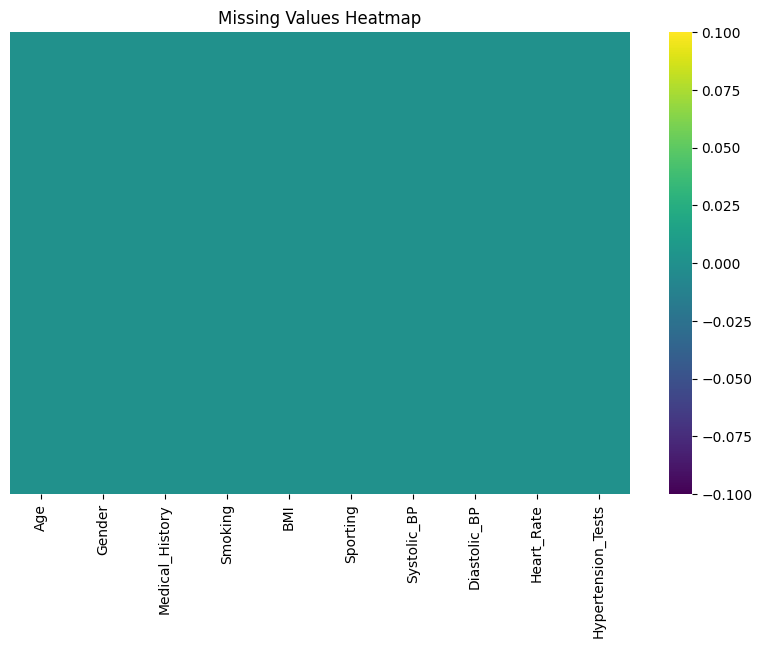

In [9]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())
print("\nMissing values percentage:\n", round(data.isnull().sum() / len(data) * 100, 2))

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
# Descriptive statistics
print("Descriptive Statistics:")
data.describe()

Descriptive Statistics:


Age        Gender  Medical_History       Smoking  \
count  10000.000000  10000.000000     10000.000000  10000.000000   
mean      50.147700      0.504300         0.497400      0.497400   
std       17.562976      0.500007         0.500018      0.500018   
min       20.000000      0.000000         0.000000      0.000000   
25%       35.000000      0.000000         0.000000      0.000000   
50%       50.000000      1.000000         0.000000      0.000000   
75%       66.000000      1.000000         1.000000      1.000000   
max       80.000000      1.000000         1.000000      1.000000   

                BMI      Sporting   Systolic_BP  Diastolic_BP    Heart_Rate  \
count  10000.000000  10000.000000  10000.000000   10000.00000  10000.000000   
mean      28.938580      0.494900    134.499500      89.80030     85.074600   
std        6.352628      0.499999     26.199936      17.78621     20.526587   
min       18.000000      0.000000     90.000000      60.00000     50.000000   
25%       23.400000      0.000000    112.000000      74.00000     67.000000   
50%       28.950000      0.000000    134.000000      90.00000     85.000000   
75%       34.370000      1.000000    158.000000     105.00000    103.000000   
max       40.000000      1.000000    180.000000     120.00000    120.000000   

       Hypertension_Tests  
count         10000.00000  
mean              0.70860  
std               0.45443  
min               0.00000  
25%               0.00000  
50%               1.00000  
75%               1.00000  
max               1.00000

In [26]:
# For categorical variables
categorical_cols = data[["Gender","Medical_History","Smoking", "Sporting", "Hypertension_Tests"]].columns #data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    print("\nCategorical variables summary:")
    for col in categorical_cols:
        print(f"\n{col} value counts:")
        print(data[col].value_counts())


Categorical variables summary:

Gender value counts:
Gender
1    5043
0    4957
Name: count, dtype: int64

Medical_History value counts:
Medical_History
0    5026
1    4974
Name: count, dtype: int64

Smoking value counts:
Smoking
0    5026
1    4974
Name: count, dtype: int64

Sporting value counts:
Sporting
0    5051
1    4949
Name: count, dtype: int64

Hypertension_Tests value counts:
Hypertension_Tests
1    7086
0    2914
Name: count, dtype: int64


In [27]:
categorical_cols

Index(['Gender', 'Medical_History', 'Smoking', 'Sporting',
       'Hypertension_Tests'],
      dtype='object')

### Distribution Analysis

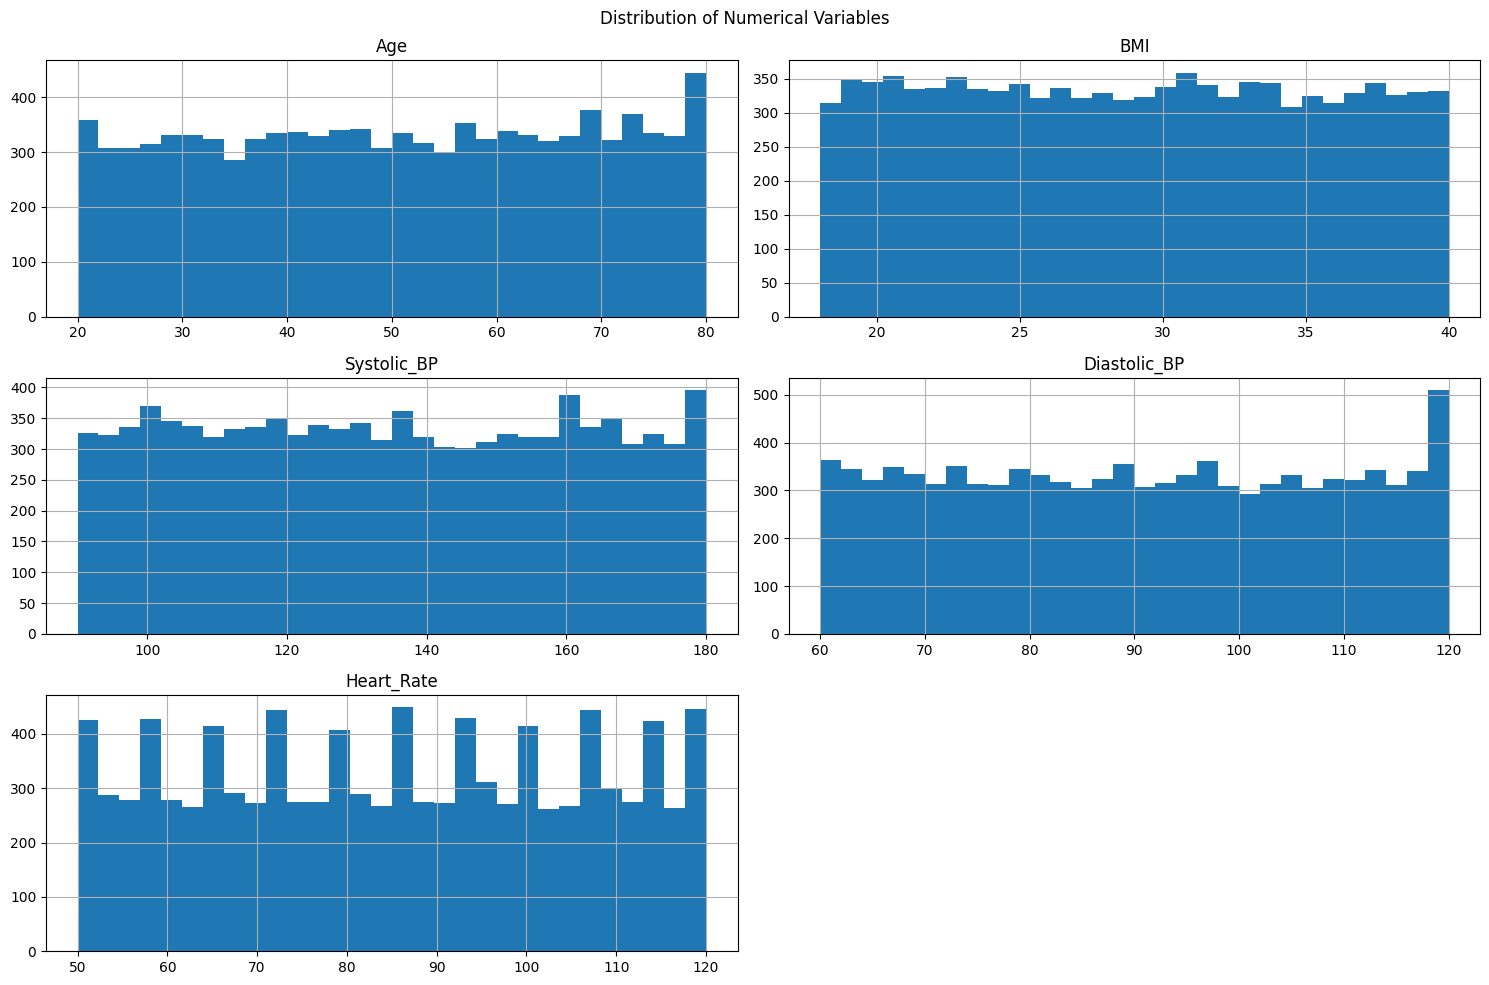

In [28]:
#numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = ['Age', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate']
data[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Variables')
plt.tight_layout()
plt.show()

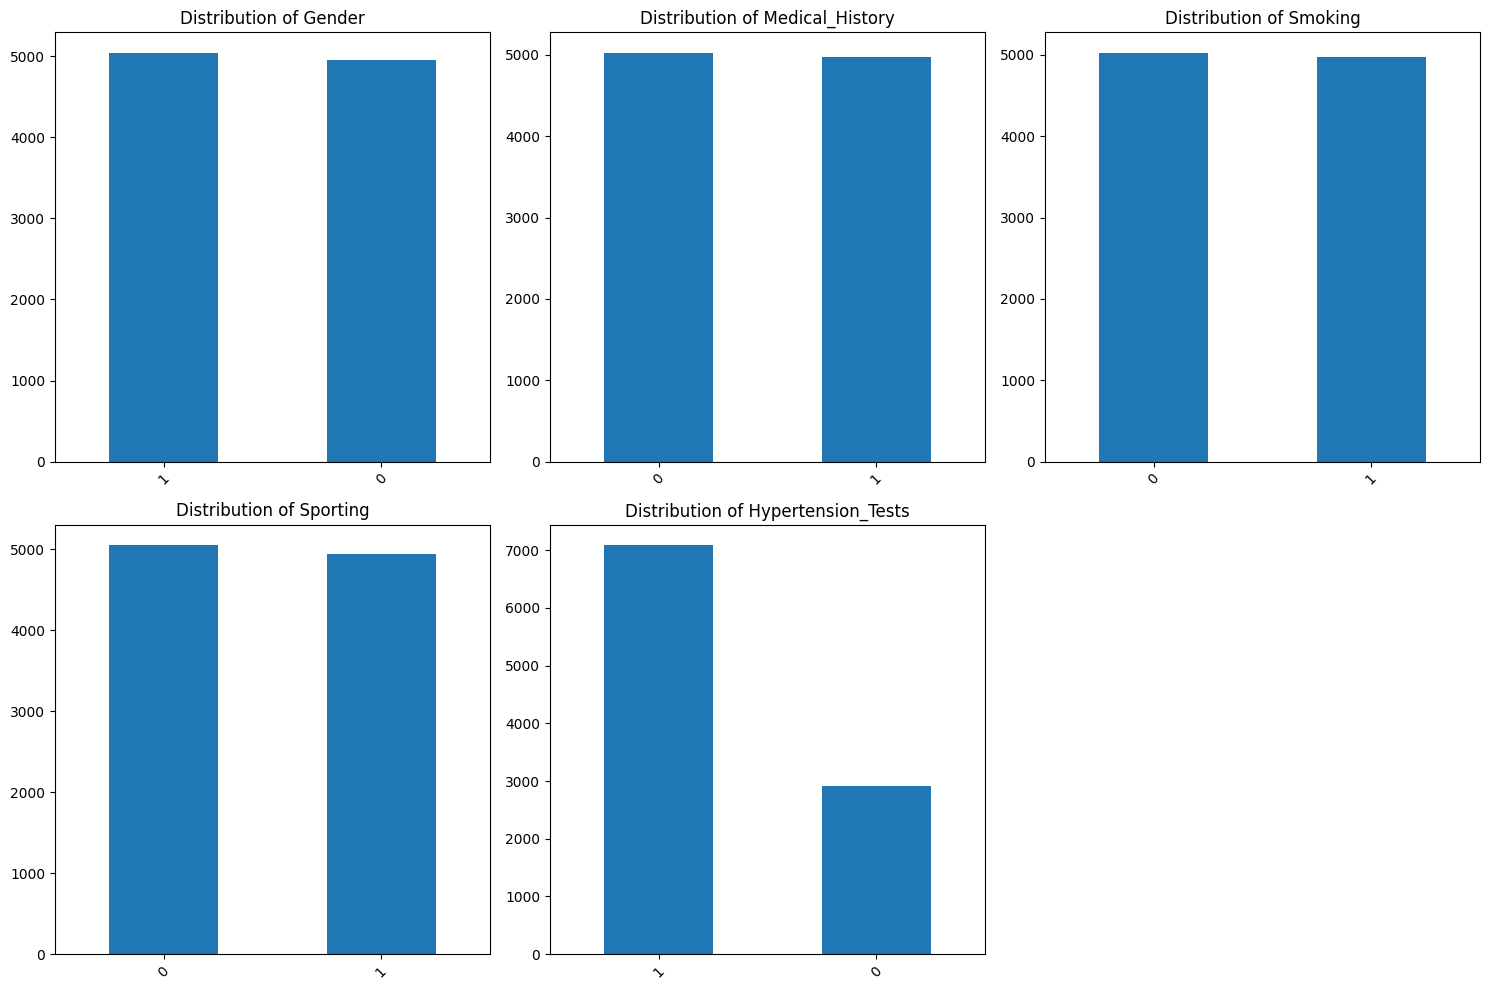

In [29]:
import math

n_cols = 3
n_rows = math.ceil(len(categorical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten() if n_rows > 1 else axes  # Flatten if multiple rows

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        data[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].set_xlabel('')

for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

### Correlation Analysis

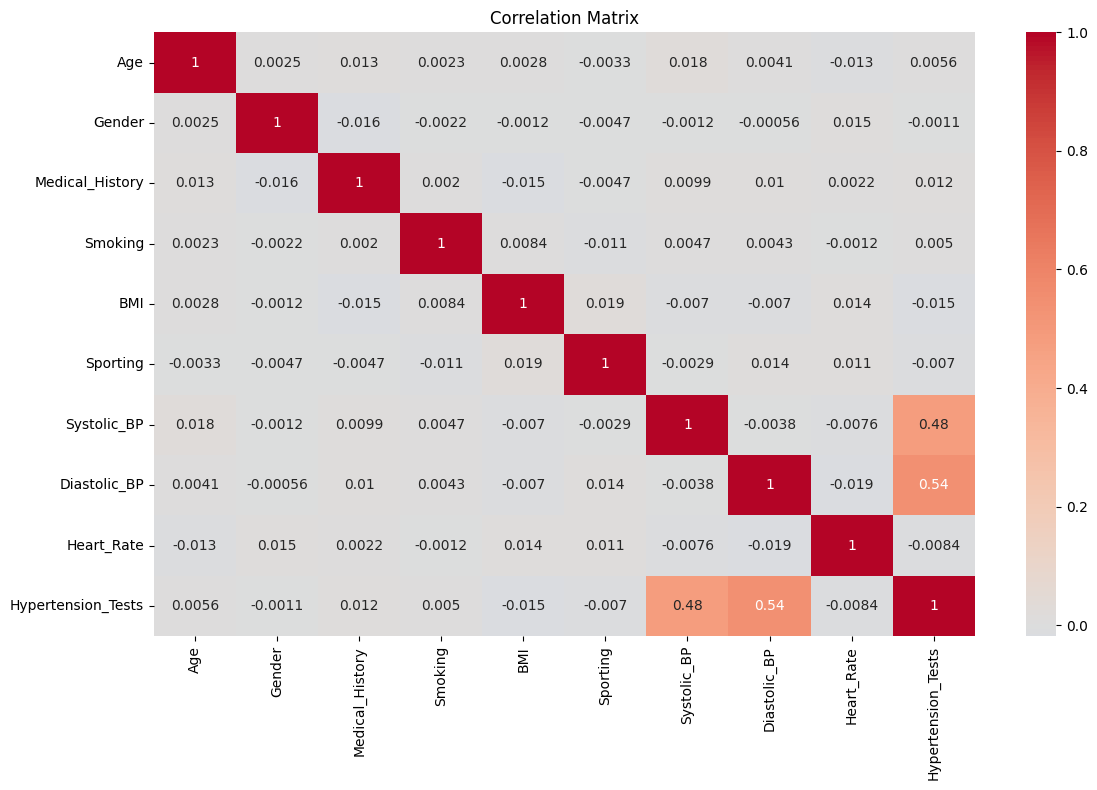

In [21]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

- Systolic_BP and Diastolic_BP are key driver of Hypertension

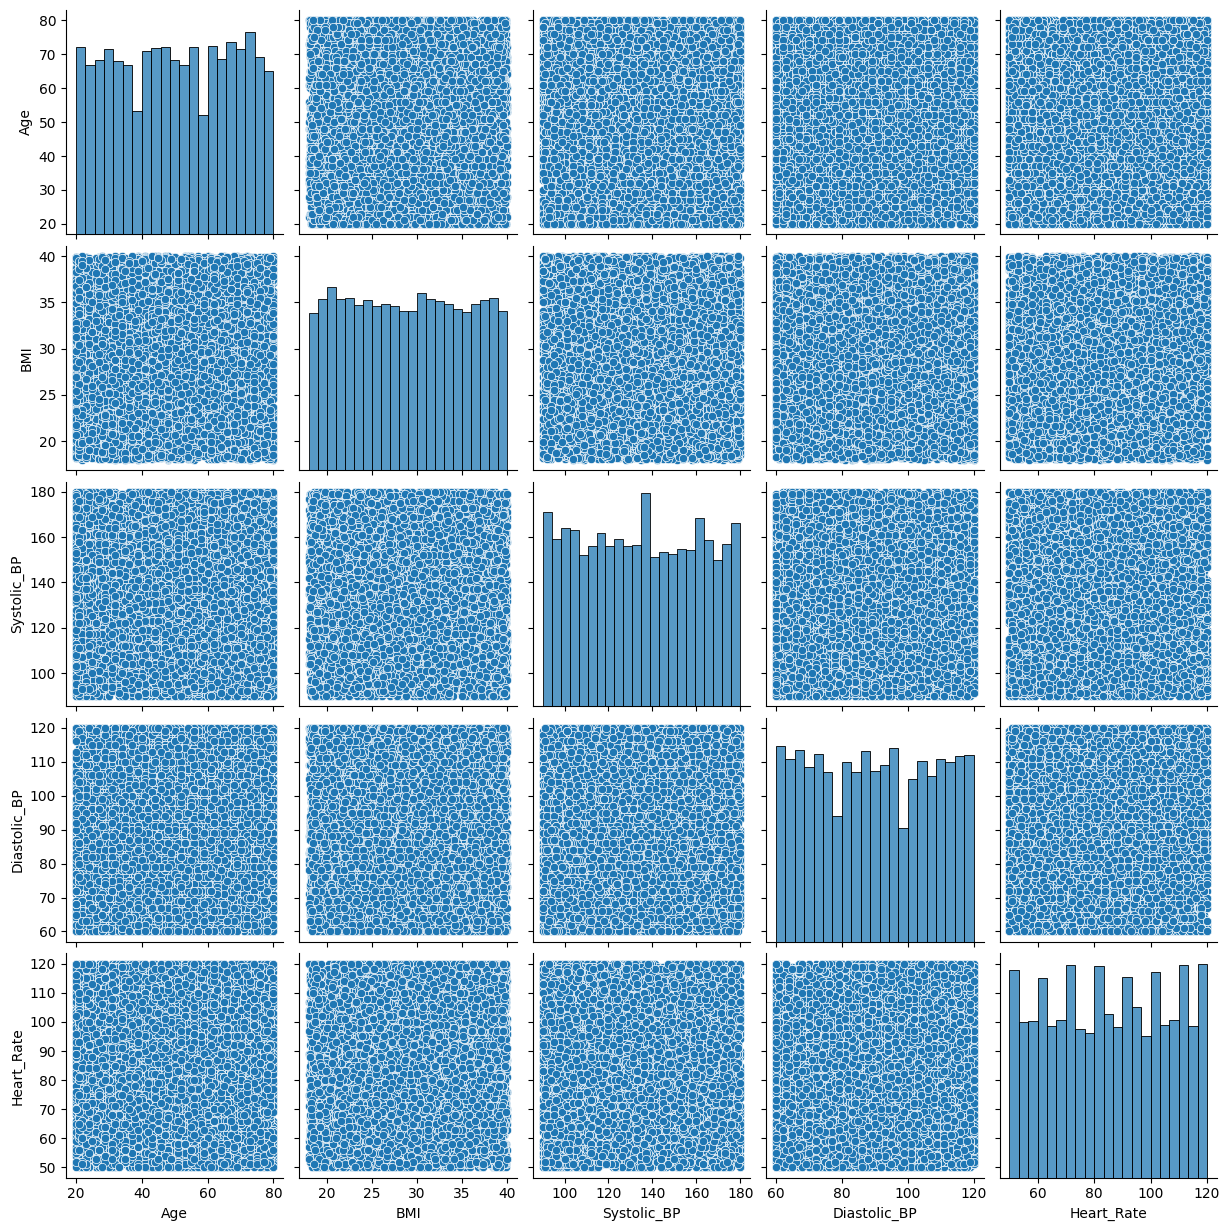

In [31]:
sns.pairplot(data[numerical_cols])  
plt.show()

### Relationship Analysis

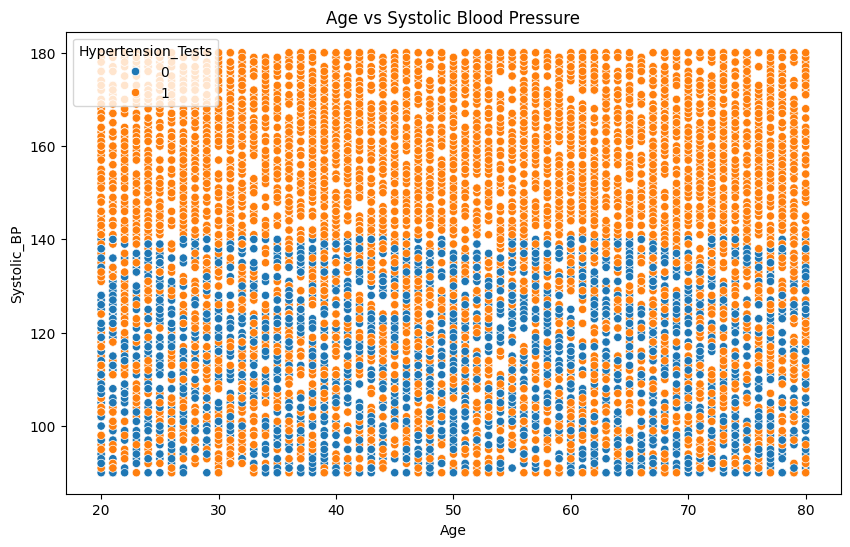

In [32]:
if 'Age' in data.columns and 'Systolic_BP' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Age', y='Systolic_BP', hue='Hypertension_Tests' if 'Hypertension_Tests' in data.columns else None)
    plt.title('Age vs Systolic Blood Pressure')
    plt.show()

- majority of people with hypertension has systolic BP greater than 140, but there are some rare cases where lower than 140 mmHg has Hypertension

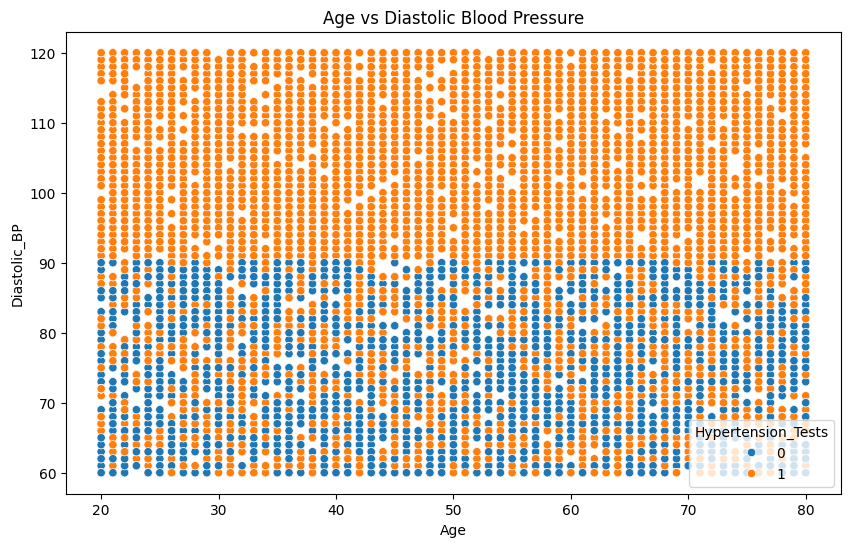

In [33]:
if 'Age' in data.columns and 'Diastolic_BP' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Age', y='Diastolic_BP', hue='Hypertension_Tests' if 'Hypertension_Tests' in data.columns else None)
    plt.title('Age vs Diastolic Blood Pressure')
    plt.show()

Counts of people in each age bracket:
Age_Bracket
0-18        0
19-30    1619
31-40    1600
41-50    1655
51-60    1630
61-70    1696
70+      1800
Name: count, dtype: int64


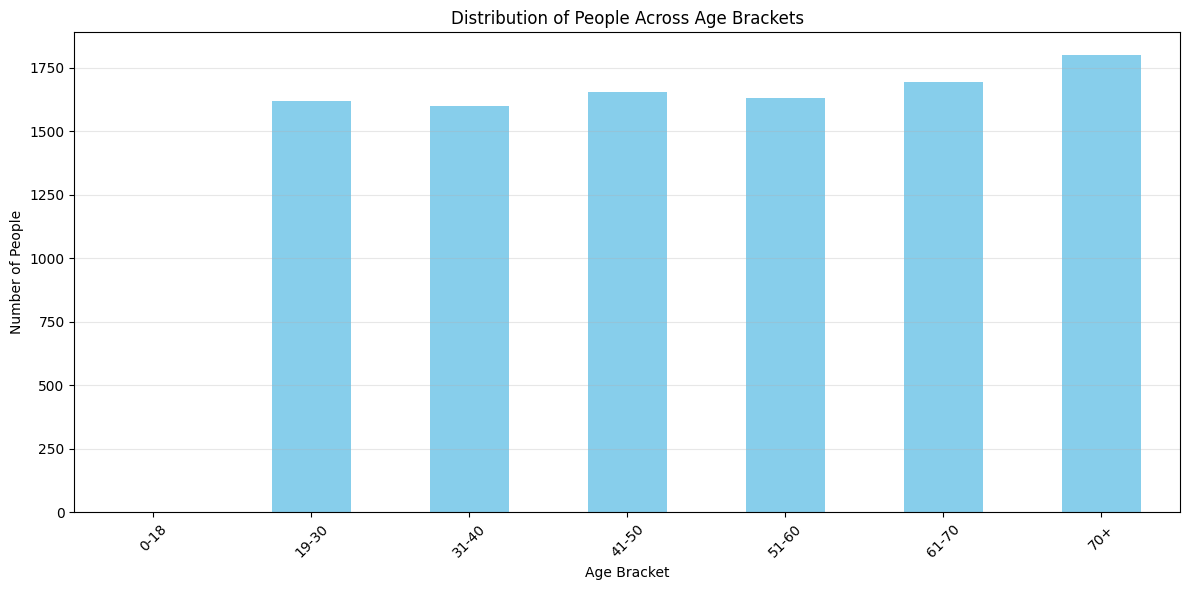

In [34]:
if 'Age' in data.columns:
    bins = [0, 18, 30, 40, 50, 60, 70, 100]
    labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']
    
    data['Age_Bracket'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
    
    age_bracket_counts = data['Age_Bracket'].value_counts().sort_index()
    
    print("Counts of people in each age bracket:")
    print(age_bracket_counts)
    
    plt.figure(figsize=(12, 6))
    age_bracket_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribution of People Across Age Brackets')
    plt.xlabel('Age Bracket')
    plt.ylabel('Number of People')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

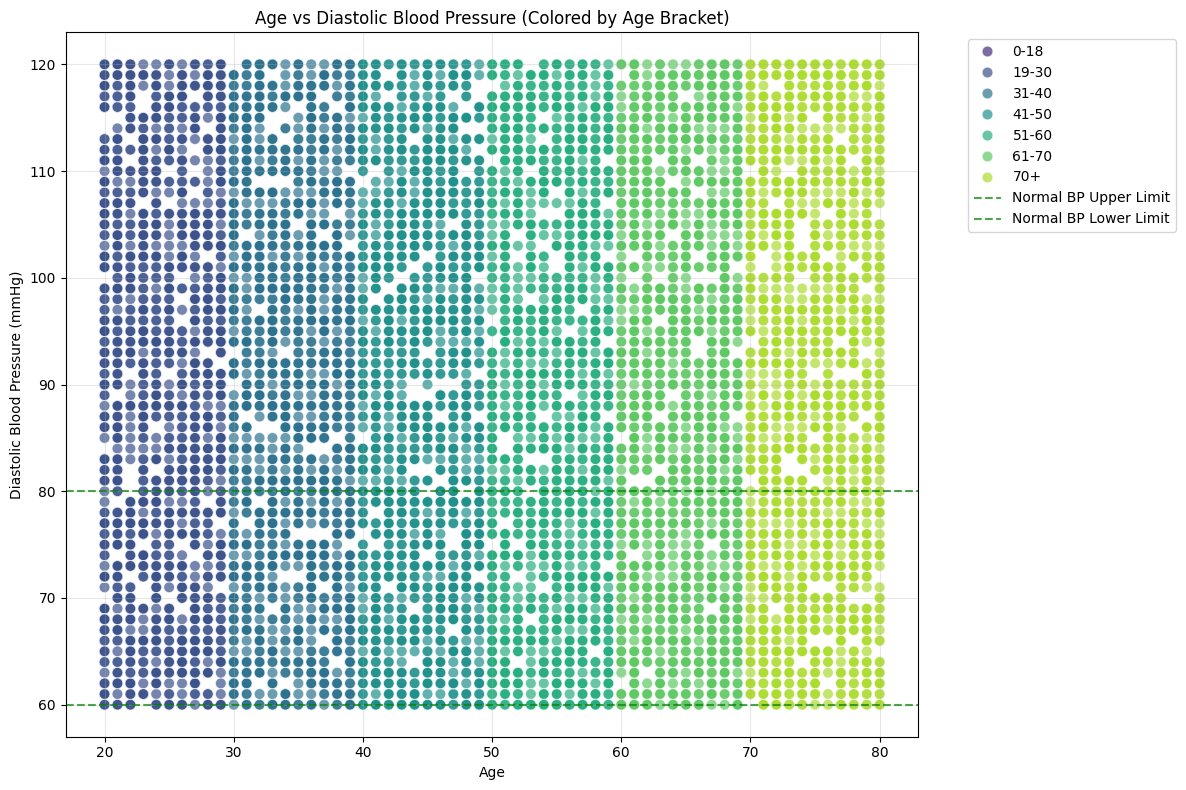

In [35]:
# Create the scatter plot with age bracket coloring
if 'Age' in data.columns and 'Diastolic_BP' in data.columns:
    plt.figure(figsize=(12, 8))
    
    # Use age brackets for hue if available, otherwise use Hypertension_Tests
    if 'Age_Bracket' in data.columns:
        scatter = sns.scatterplot(data=data, x='Age', y='Diastolic_BP', hue='Age_Bracket', 
                                 palette='viridis', s=60, alpha=0.7)
        plt.title('Age vs Diastolic Blood Pressure (Colored by Age Bracket)')
    elif 'Hypertension_Tests' in data.columns:
        scatter = sns.scatterplot(data=data, x='Age', y='Diastolic_BP', hue='Hypertension_Tests',
                                 palette='coolwarm', s=60, alpha=0.7)
        plt.title('Age vs Diastolic Blood Pressure (Colored by Hypertension Tests)')
    else:
        scatter = sns.scatterplot(data=data, x='Age', y='Diastolic_BP', 
                                 color='blue', s=60, alpha=0.7)
        plt.title('Age vs Diastolic Blood Pressure')
    
    # Add reference lines for normal diastolic BP range (typically 60-80 mmHg)
    plt.axhline(y=80, color='green', linestyle='--', alpha=0.7, label='Normal BP Upper Limit')
    plt.axhline(y=60, color='green', linestyle='--', alpha=0.7, label='Normal BP Lower Limit')
    
    plt.xlabel('Age')
    plt.ylabel('Diastolic Blood Pressure (mmHg)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

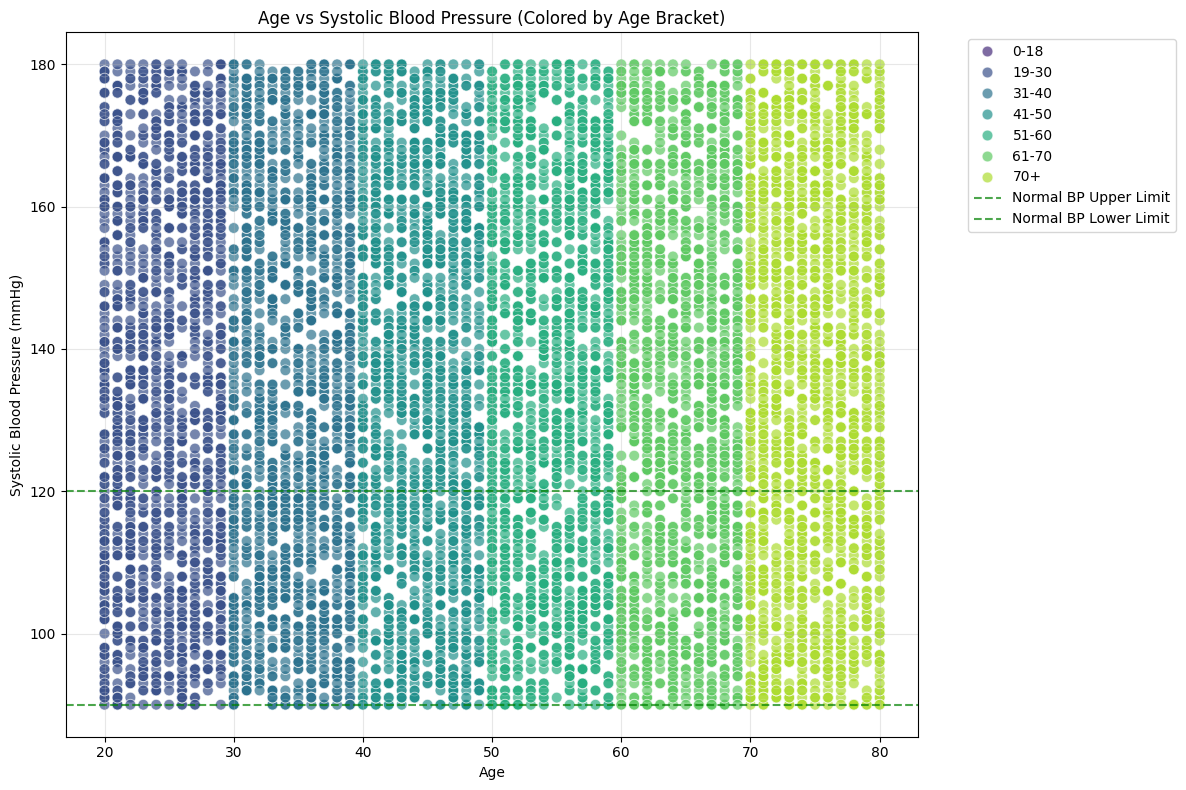

In [37]:
# Create the scatter plot with age bracket coloring
if 'Age' in data.columns and 'Systolic_BP' in data.columns:
    plt.figure(figsize=(12, 8))
    
    # Use age brackets for hue if available, otherwise use Hypertension_Tests
    if 'Age_Bracket' in data.columns:
        scatter = sns.scatterplot(data=data, x='Age', y='Systolic_BP', hue='Age_Bracket', 
                                 palette='viridis', s=60, alpha=0.7)
        plt.title('Age vs Systolic Blood Pressure (Colored by Age Bracket)')
    elif 'Hypertension_Tests' in data.columns:
        scatter = sns.scatterplot(data=data, x='Age', y='Systolic_BP', hue='Hypertension_Tests',
                                 palette='coolwarm', s=60, alpha=0.7)
        plt.title('Age vs Systolic Blood Pressure (Colored by Hypertension Tests)')
    else:
        scatter = sns.scatterplot(data=data, x='Age', y='Systolic_BP', 
                                 color='blue', s=60, alpha=0.7)
        plt.title('Age vs Systolic Blood Pressure')
    
    # Add reference lines for normal diastolic BP range (typically 60-80 mmHg)
    plt.axhline(y=120, color='green', linestyle='--', alpha=0.7, label='Normal BP Upper Limit')
    plt.axhline(y=90, color='green', linestyle='--', alpha=0.7, label='Normal BP Lower Limit')
    
    plt.xlabel('Age')
    plt.ylabel('Systolic Blood Pressure (mmHg)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

### Outlier Detection

In [38]:
# Z-score method for outlier detection
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(data[numerical_cols]))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers (Z-score > 3) per column:")
print(outliers)

Outliers (Z-score > 3) per column:
Age             0
BMI             0
Systolic_BP     0
Diastolic_BP    0
Heart_Rate      0
dtype: int64


### Data Quality Checks

In [39]:
# Check for duplicates
print("Duplicate rows:", data.duplicated().sum())

# Check for inconsistent data
for col in categorical_cols:
    print(f"\nUnique values in {col}:", data[col].unique())

Duplicate rows: 0

Unique values in Gender: [1 0]

Unique values in Medical_History: [1 0]

Unique values in Smoking: [0 1]

Unique values in Sporting: [1 0]

Unique values in Hypertension_Tests: [0 1]


### Create a Preprocessing Pipeline

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [41]:
numerical_cols = ['Age', 'BMI', 'Systolic_BP', 'Diastolic_BP', 'Heart_Rate']
categorical_cols = ['Gender', 'Medical_History', 'Smoking', 'Sporting']

target = 'Hypertension_Tests' 

X = data[numerical_cols + categorical_cols]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Preprocessing Transformers

In [42]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
       ('num', numerical_transformer, numerical_cols),
       ('cat', categorical_transformer, categorical_cols) 
    ])

### Train and Evaluate Models

In [43]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.1 MB/s eta 0:00:00a 0:00:010m


In [44]:
from xgboost import XGBClassifier

In [45]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        max_depth=10
    ))
])

lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=1000,
        C=1.0
    ))
])


xgb_pipeline = Pipeline(steps=[
     ('preprocessor', preprocessor),
     ('classifier', XGBClassifier(random_state=42))
 ])

In [46]:
# Dictionary to store model performances
models = {
    'Random Forest': rf_pipeline,
    'Logistic Regression': lr_pipeline,
    'XGBoost Classifier': xgb_pipeline
}

results = {}

for name, pipeline in models.items():
    print(f"Training {name}...")
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results[name] = {
        'pipeline': pipeline,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'accuracy': accuracy
    }
    
    print(f"{name} Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("=" * 50)

Training Random Forest...
Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00      1417

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Training Logistic Regression...
Logistic Regression Accuracy: 0.9065
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       583
           1       0.93      0.94      0.93      1417

    accuracy                           0.91      2000
   macro avg       0.89      0.88      0.89      2000
weighted avg       0.91      0.91      0.91      2000

Training XGBoost Classifier...
XGBoost Classifier Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       583
           1       1.00      1.00      1.00 

In [47]:
print("Model Comparison:")
for name, result in results.items():
    print(f"{name}: {result['accuracy']:.4f}")

feature_names = (
    numerical_cols + 
    list(results['Random Forest']['pipeline']
         .named_steps['preprocessor']
         .named_transformers_['cat']
         .named_steps['onehot']
         .get_feature_names_out(categorical_cols))
)

# Feature importance for Random Forest
if 'Random Forest' in results:
    rf_model = results['Random Forest']['pipeline'].named_steps['classifier']
    importances = rf_model.feature_importances_
    
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance_df.head(10))

Model Comparison:
Random Forest: 1.0000
Logistic Regression: 0.9065
XGBoost Classifier: 1.0000

Top 10 Most Important Features:
              feature  importance
3        Diastolic_BP    0.514596
2         Systolic_BP    0.446568
1                 BMI    0.011992
4          Heart_Rate    0.010233
0                 Age    0.009564
10          Smoking_1    0.001009
5            Gender_0    0.000938
7   Medical_History_0    0.000895
9           Smoking_0    0.000895
8   Medical_History_1    0.000872


###  Save and Load Pipeline

In [48]:
import joblib

# Save the best pipeline
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_pipeline = results[best_model_name]['pipeline']

# Save the pipeline
joblib.dump(best_pipeline, 'hypertension_model.pkl')
print(f"Saved best model ({best_model_name}) as 'hypertension_model.pkl'")


Saved best model (Random Forest) as 'hypertension_model.pkl'


In [ ]:
# Load the pipeline for future use
loaded_pipeline = joblib.load('hypertension_model.pkl')
# new_predictions = loaded_pipeline.predict(new_data)

#### Basic Cross-Validation

In [ ]:
from ml.cross_validator import CrossValidator
from ml.training_pipeline import TrainingPipeline

# Initialize your training pipeline
training_pipeline = TrainingPipeline()
training_pipeline.fit(X_train, y_train)

# Perform cross-validation
cv = CrossValidator(pipeline=training_pipeline.pipeline, n_splits=5)
cv_results = cv.cross_validate(X_train, y_train)

# Comprehensive evaluation
metrics = cv.evaluate_model(X_train, y_train, save_plots=True, plot_path='results/')

#### Hyperparameter Tuning

In [ ]:
from ml.cross_validator import HyperparameterTuner

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

# Perform grid search
tuner = HyperparameterTuner(training_pipeline.pipeline, param_grid)
grid_search = tuner.grid_search(X_train, y_train, scoring='f1')